In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import json 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


fortuna us
bluff nz
butaritari ki
east london za
rikitea pf
grajau br
bitung id
narsaq gl
bredasdorp za
cherskiy ru
namibe ao
sisimiut gl
busselton au
rikitea pf
aklavik ca
sioni ge
qandala so
taolanaro mg
mercedes ar
ilorin ng
rikitea pf
taolanaro mg
nouadhibou mr
ushuaia ar
hermanus za
qaanaaq gl
safita sy
bluff nz
dawlatabad af
hovd mn
corrente br
chuy uy
caluquembe ao
kapaa us
bilibino ru
yellowknife ca
rikitea pf
punta arenas cl
talakan ru
hendijan ir
kapaa us
illoqqortoormiut gl
thompson ca
leningradskiy ru
barentsburg sj
saint-philippe re
peniche pt
khartoum sd
buta cd
lanzhou cn
badarpur in
okha ru
hobart au
hayrabolu tr
ushuaia ar
cherskiy ru
lorengau pg
golden rock an
attawapiskat ca
kodiak us
port elizabeth za
busselton au
comodoro rivadavia ar
lolua tv
qaanaaq gl
atuona pf
belushya guba ru
kysyl-syr ru
aklavik ca
hays us
arman ru
attawapiskat ca
saint-philippe re
busselton au
rio gallegos ar
dikson ru
rikitea pf
san cristobal ec
grand river south east mu
port blair in
bethe

saldanha za
tiksi ru
taolanaro mg
obo cf
thompson ca
vaini to
tuatapere nz
punta arenas cl
uruacu br
wanning cn
yellowknife ca
rikitea pf
prince rupert ca
dikson ru
punta arenas cl
dikson ru
constitucion mx
ushuaia ar
touros br
thompson ca
manaus br
hermanus za
boddam gb
busselton au
albany au
kavieng pg
yellowknife ca
bouguenais fr
amderma ru
hobart au
havoysund no
labuhan id
hobart au
lebu cl
ushuaia ar
port alfred za
ciudad bolivar ve
tiksi ru
chokurdakh ru
ushuaia ar
attawapiskat ca
hilo us
nyrob ru
severo-kurilsk ru
vila franca do campo pt
luderitz na
grindavik is
cape town za
punta arenas cl
turan ru
new norfolk au
airai pw
jamestown sh
alofi nu
aykhal ru
san rafael ar
chuy uy
mataura pf
yar-sale ru
luanda ao
bredasdorp za
barrow us
alto araguaia br
tsumeb na
touros br
marzuq ly
man ci
katsuura jp
bluff nz
taolanaro mg
jamestown sh
hatton lk
bredasdorp za
albany au
luderitz na
belushya guba ru
rapid valley us
ushuaia ar
buraydah sa
qaanaaq gl
kapaa us
mar del plata ar
thompson ca

san patricio mx
longyearbyen sj
puerto ayora ec
ushuaia ar
hobart au
coahuayana mx
avarua ck
carnarvon au
hermanus za
manga br
port alfred za
samusu ws


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [9]:
import requests
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):


    # Group cities in sets of 50 for logging purposes.
        if (i % 50 == 0 and i >= 50):
            set_count += 1
            record_count = 1
            time.sleep(60)

    # Create endpoint URL with each city.
        city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        # Add 1 to the record count.
        record_count += 1
        
        # Run an API request for each of the cities.
        try:
        # Parse the JSON and retrieve data.
            city_weather = requests.get(city_url).json()
        # Parse out the needed data.
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
            city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
            city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        # If an error is experienced, skip the city.
        except:
            print("City not found. Skipping...")
            pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fortuna
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | east london
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | grajau
Processing Record 7 of Set 1 | bitung
Processing Record 8 of Set 1 | narsaq
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | sisimiut
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | aklavik
Processing Record 15 of Set 1 | sioni
Processing Record 16 of Set 1 | qandala
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | mercedes
Processing Record 19 of Set 1 | ilorin
Processing Record 20 of Set 1 | nouadhibou
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | hermanus
Processing Record 23 of Set 1

Processing Record 35 of Set 4 | aksu
Processing Record 36 of Set 4 | oranjestad
Processing Record 37 of Set 4 | ponta do sol
Processing Record 38 of Set 4 | haines junction
Processing Record 39 of Set 4 | sovetskaya gavan
Processing Record 40 of Set 4 | preobrazheniye
Processing Record 41 of Set 4 | eldikan
City not found. Skipping...
Processing Record 42 of Set 4 | torbay
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | hualmay
Processing Record 45 of Set 4 | toliary
City not found. Skipping...
Processing Record 46 of Set 4 | ozernovskiy
Processing Record 47 of Set 4 | coquimbo
Processing Record 48 of Set 4 | caiaponia
Processing Record 49 of Set 4 | alibag
Processing Record 50 of Set 4 | pangnirtung
Processing Record 1 of Set 5 | impfondo
Processing Record 2 of Set 5 | tevriz
Processing Record 3 of Set 5 | vila velha
Processing Record 4 of Set 5 | las margaritas
Processing Record 5 of Set 5 | kirovskiy
Processing Record 6 of Set 5 | bambous virieux
Processing R

Processing Record 24 of Set 8 | wanning
Processing Record 25 of Set 8 | prince rupert
Processing Record 26 of Set 8 | touros
Processing Record 27 of Set 8 | manaus
Processing Record 28 of Set 8 | boddam
Processing Record 29 of Set 8 | bouguenais
Processing Record 30 of Set 8 | havoysund
Processing Record 31 of Set 8 | labuhan
Processing Record 32 of Set 8 | ciudad bolivar
Processing Record 33 of Set 8 | nyrob
Processing Record 34 of Set 8 | vila franca do campo
Processing Record 35 of Set 8 | luderitz
Processing Record 36 of Set 8 | grindavik
Processing Record 37 of Set 8 | turan
Processing Record 38 of Set 8 | aykhal
Processing Record 39 of Set 8 | san rafael
Processing Record 40 of Set 8 | yar-sale
Processing Record 41 of Set 8 | luanda
Processing Record 42 of Set 8 | alto araguaia
Processing Record 43 of Set 8 | tsumeb
Processing Record 44 of Set 8 | marzuq
Processing Record 45 of Set 8 | man
Processing Record 46 of Set 8 | hatton
Processing Record 47 of Set 8 | rapid valley
Process

Processing Record 14 of Set 12 | aksum
Processing Record 15 of Set 12 | valparaiso
Processing Record 16 of Set 12 | garachine
Processing Record 17 of Set 12 | moroni
Processing Record 18 of Set 12 | frankfort
Processing Record 19 of Set 12 | honiara
Processing Record 20 of Set 12 | ucluelet
Processing Record 21 of Set 12 | nanchong
Processing Record 22 of Set 12 | roma
Processing Record 23 of Set 12 | hambantota
Processing Record 24 of Set 12 | trincomalee
Processing Record 25 of Set 12 | mocambique
City not found. Skipping...
Processing Record 26 of Set 12 | moron
Processing Record 27 of Set 12 | ouadda
Processing Record 28 of Set 12 | port hawkesbury
Processing Record 29 of Set 12 | north branch
Processing Record 30 of Set 12 | chernyshevskiy
Processing Record 31 of Set 12 | damghan
Processing Record 32 of Set 12 | yenotayevka
Processing Record 33 of Set 12 | tashtagol
Processing Record 34 of Set 12 | orange walk
Processing Record 35 of Set 12 | ordu
Processing Record 36 of Set 12 | 

In [12]:
len(city_data)

540

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.5982,-124.1573,52.66,96,75,12.66,US,2022-04-04 18:29:25
1,Bluff,-46.6000,168.3333,54.54,81,100,9.19,NZ,2022-04-04 18:33:38
2,Butaritari,3.0707,172.7902,81.59,79,34,13.76,KI,2022-04-04 18:33:38
3,East London,-33.0153,27.9116,67.14,82,0,13.80,ZA,2022-04-04 18:33:39
4,Rikitea,-23.1203,-134.9692,77.76,63,5,11.50,PF,2022-04-04 18:33:09
5,Grajau,-5.8194,-46.1386,83.79,77,98,1.16,BR,2022-04-04 18:33:39
6,Bitung,1.4451,125.1824,76.05,77,100,2.64,ID,2022-04-04 18:33:39
7,Narsaq,60.9167,-46.0500,50.22,71,100,1.81,GL,2022-04-04 18:33:40
8,Bredasdorp,-34.5322,20.0403,63.79,73,7,13.53,ZA,2022-04-04 18:33:40
9,Cherskiy,68.7500,161.3000,-22.85,99,71,1.86,RU,2022-04-04 18:33:40


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.tail()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
535,Saint-Joseph,RE,2022-04-04 18:55:55,-21.3667,55.6167,75.58,85,99,10.54
536,Qasigiannguit,GL,2022-04-04 18:55:56,68.8193,-51.1922,29.61,83,16,1.97
537,Akbarpur,IN,2022-04-04 18:55:56,26.4167,82.5500,80.04,7,0,3.83
538,Coahuayana,MX,2022-04-04 18:55:56,18.7333,-103.6833,86.09,42,53,7.70
539,Manga,BF,2022-04-04 18:55:57,11.6636,-1.0731,94.33,28,92,5.32


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

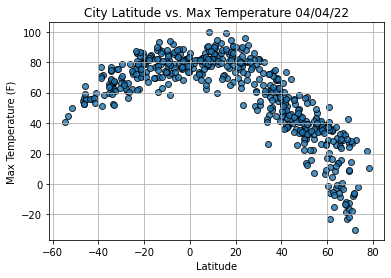

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

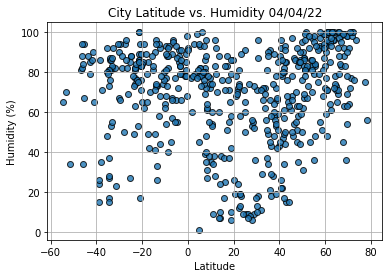

In [24]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

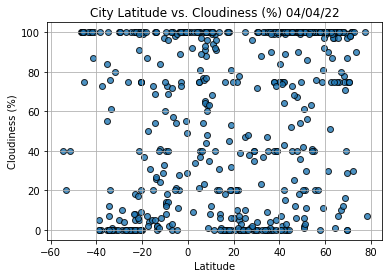

In [25]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

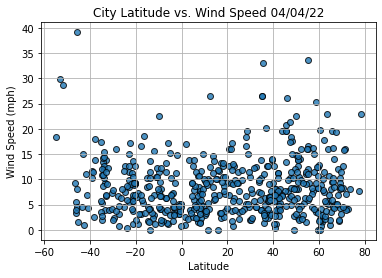

In [26]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()